#

In [3]:
%load_ext autoreload
%autoreload 2
from system.system_development.strategies.trend_pullback_v1.run_backtest import run_backtest_for_default_universe
from system.system_development.strategies.trend_pullback_v1.config import StrategyParams

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



=== Running backtest for ^GSPC ===

Signal counts for ^GSPC:
Signal
0    892
1     76
Name: count, dtype: int64

Exit breakdown for ^GSPC:
  All trades       :   40 trades, avg holding   2.05 days
  tp            :    7 trades, avg holding   3.79 days
  stop          :   15 trades, avg holding   1.61 days
  trend_exit    :   18 trades, avg holding   1.74 days


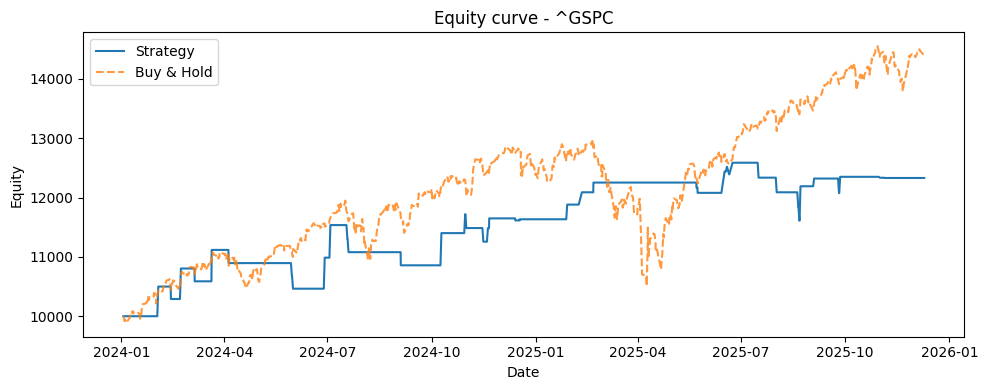


=== Running backtest for ^NDX ===

Signal counts for ^NDX:
Signal
0    901
1     67
Name: count, dtype: int64

Exit breakdown for ^NDX:
  All trades       :   45 trades, avg holding   1.63 days
  tp            :    8 trades, avg holding   3.31 days
  stop          :   10 trades, avg holding   1.90 days
  trend_exit    :   27 trades, avg holding   1.02 days


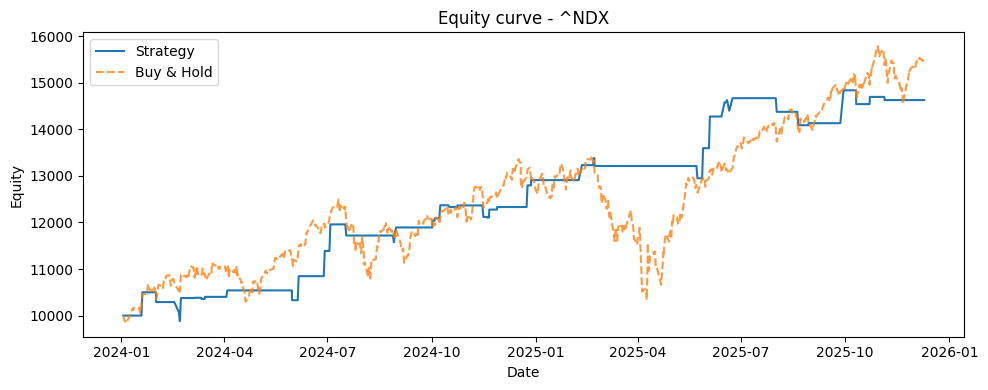


=== Running backtest for ^FTSE ===

Signal counts for ^FTSE:
Signal
0    1362
1     110
Name: count, dtype: int64

Exit breakdown for ^FTSE:
  All trades       :   57 trades, avg holding   1.61 days
  trend_exit    :   26 trades, avg holding   1.15 days
  tp            :   11 trades, avg holding   3.44 days
  stop          :   20 trades, avg holding   1.20 days


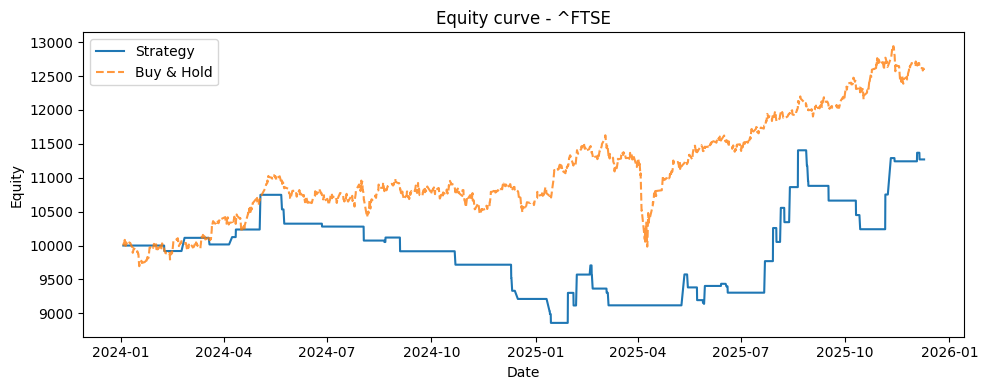


=== Running backtest for EURUSD=X ===

Signal counts for EURUSD=X:
Signal
 0    2674
 1     184
-1     174
Name: count, dtype: int64

Exit breakdown for EURUSD=X:
  All trades       :  164 trades, avg holding   0.86 days
  tp            :   19 trades, avg holding   2.24 days
  stop          :   62 trades, avg holding   0.75 days
  trend_exit    :   83 trades, avg holding   0.63 days


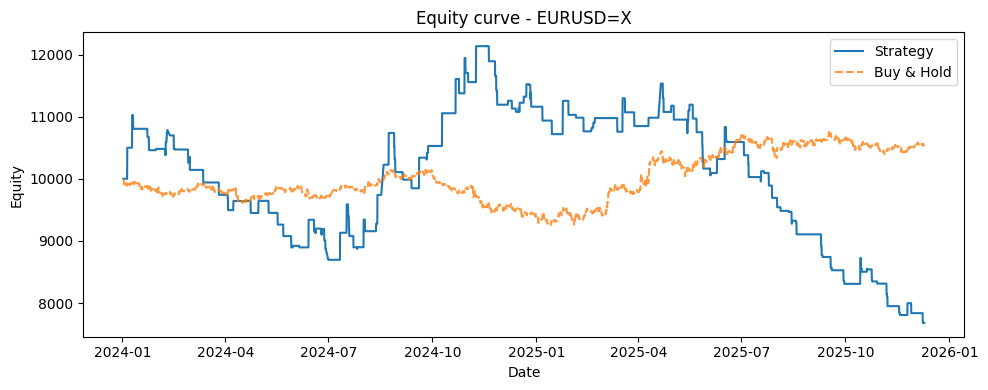


=== Backtest statistics for PORTFOLIO_EQUAL_WEIGHT ===
start_equity        : 10000.0000
end_equity          : 7680.5841
total_return_pct    :   -23.19%
max_drawdown_pct    :   -36.70%
num_trades          : 306.0000
win_rate_pct        :    40.20%
avg_win             : 273.4519
avg_loss            : -152.3334
profit_factor       :   1.2132
sharpe_ratio        :  -0.4861


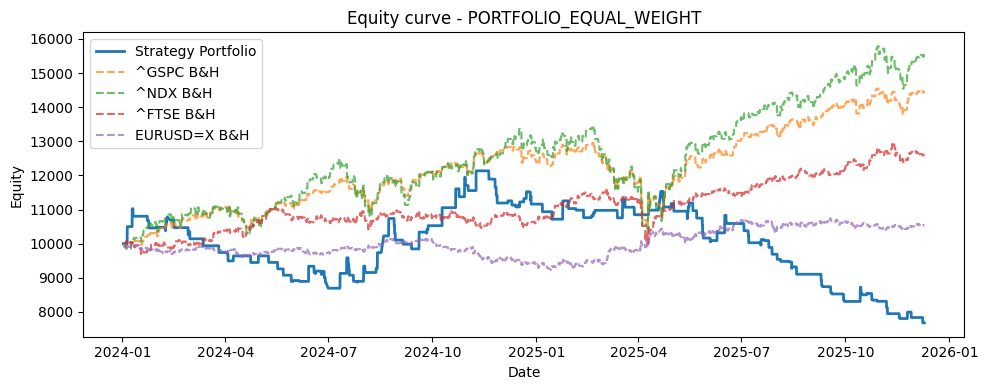


=== Backtest statistics for ^GSPC ===
start_equity        : 10000.0000
end_equity          : 12330.6940
total_return_pct    :    23.31%
max_drawdown_pct    :    -7.76%
num_trades          :  40.0000
win_rate_pct        :    47.50%
avg_win             : 322.5931
avg_loss            : -180.8845
profit_factor       :   1.6136
sharpe_ratio        :   0.7478

=== Backtest statistics for ^NDX ===
start_equity        : 10000.0000
end_equity          : 14628.3016
total_return_pct    :    46.28%
max_drawdown_pct    :    -5.88%
num_trades          :  45.0000
win_rate_pct        :    62.22%
avg_win             : 277.1127
avg_loss            : -184.1678
profit_factor       :   2.4783
sharpe_ratio        :   1.2923

=== Backtest statistics for ^FTSE ===
start_equity        : 10000.0000
end_equity          : 11270.3193
total_return_pct    :    12.70%
max_drawdown_pct    :   -17.58%
num_trades          :  57.0000
win_rate_pct        :    33.33%
avg_win             : 340.5768
avg_loss            : -1

In [4]:
if __name__ == "__main__":

    params_cash = StrategyParams(
        entry_mode="shallow_pullback",
        equity_mode="m2m",
        exit_mode="fixed_rr",
        tp_atr_mult=2.5,
        risk_per_trade=0.02,
    )

    results_cash = run_backtest_for_default_universe(
        params=params_cash,
        start="2024-1-01",
        end=None,
        interval="4h",
        plot=True,
        portfolio=True,
        show_benchmark=True,
    )



# Debug

In [ ]:
from system_development.engine.data_loader import download_price_data
from system_development.strategies.trend_pullback_v1.config import DEFAULT_PARAMS
from system_development.strategies.trend_pullback_v1.rules import prepare_dataframe

symbol = "^GSPC"

raw = download_price_data(symbol, start="2015-01-01", interval="1d")
df = prepare_dataframe(raw, DEFAULT_PARAMS)

df["Signal"].value_counts()
df[["Close", "EMA_Fast", "EMA_Slow", "RSI", "ADX", "Trend", "Signal"]].tail()
